In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("heart_disease_data.csv")

In [3]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [5]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [6]:
data_dup = data.duplicated().any()

In [7]:
data_dup

True

In [8]:
data = data.drop_duplicates()

In [9]:
data_dup = data.duplicated().any()

In [10]:
data_dup

False

In [11]:
cate_val =[]
cont_val =[]
for column in data.columns:
    if data[column].nunique() <=10:
        cate_val.append(column)
    else:
        cont_val.append(column)


In [12]:
cate_val

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [13]:
data['cp'].unique()

array([3, 2, 1, 0], dtype=int64)

In [14]:
cate_val.remove('sex')
cate_val.remove('target')
data = pd.get_dummies(data,columns = cate_val,drop_first=True)

In [15]:
data.head()

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,63,1,145,233,150,2.3,1,False,False,True,...,False,False,False,False,False,False,False,True,False,False
1,37,1,130,250,187,3.5,1,False,True,False,...,False,False,False,False,False,False,False,False,True,False
2,41,0,130,204,172,1.4,1,True,False,False,...,False,False,True,False,False,False,False,False,True,False
3,56,1,120,236,178,0.8,1,True,False,False,...,False,False,True,False,False,False,False,False,True,False
4,57,0,120,354,163,0.6,1,False,False,False,...,True,False,True,False,False,False,False,False,True,False


In [ ]:
st=StandardScaler()
data[cont_val]=st.fit_transform(data[cont_val])

In [17]:
data.head()

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,0.949794,1,0.764066,-0.261285,0.018826,1.084022,1,False,False,True,...,False,False,False,False,False,False,False,True,False,False
1,-1.928548,1,-0.091401,0.067741,1.636979,2.118926,1,False,True,False,...,False,False,False,False,False,False,False,False,True,False
2,-1.485726,0,-0.091401,-0.822564,0.980971,0.307844,1,True,False,False,...,False,False,True,False,False,False,False,False,True,False
3,0.174856,1,-0.661712,-0.203222,1.243374,-0.209608,1,True,False,False,...,False,False,True,False,False,False,False,False,True,False
4,0.285561,0,-0.661712,2.080602,0.587366,-0.382092,1,False,False,False,...,True,False,True,False,False,False,False,False,True,False


In [18]:
X=data.drop('target',axis=1)

In [19]:
Y=data['target']

In [20]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [ ]:
log=LogisticRegression()
log.fit(X_train,Y_train)

In [ ]:
Y_pred1=log.predict(X_test)

In [ ]:
accuracy_score(Y_test,Y_pred1)

In [24]:
svm=svm.SVC()

In [ ]:
svm.fit(X_train,Y_train)

In [ ]:
Y_pred2=svm.predict(X_test)

In [ ]:
accuracy_score(Y_test,Y_pred2)

In [28]:
knn=KNeighborsClassifier()

In [ ]:
knn.fit(X_train,Y_train)

In [ ]:
Y_pred3=knn.predict(X_test)

In [ ]:
accuracy_score(Y_test,Y_pred3)

In [ ]:
score=[]
for k in range(1,20):
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,Y_train)
    Y_pred=knn.predict(X_test)
    score.append(accuracy_score(Y_test,Y_pred))

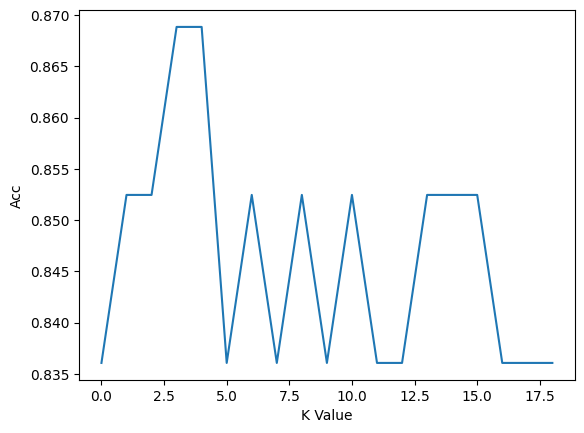

In [33]:
plt.plot(score)
plt.xlabel("K Value")
plt.ylabel("Acc")
plt.show()

In [ ]:
knn=KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train,Y_train)
Y_pred=knn.predict(X_test)
accuracy_score(Y_test,Y_pred)

In [ ]:
final_data=pd.DataFrame({'Models':['LR','SVM','KNN'],'ACC':[accuracy_score(Y_test,Y_pred1)*100,
                                                            accuracy_score(Y_test,Y_pred2)*100,
                                                            accuracy_score(Y_test,Y_pred3)*100,]})


In [36]:
final_data

,Models,ACC
0,LR,90.163934
1,SVM,86.885246
2,KNN,86.885246


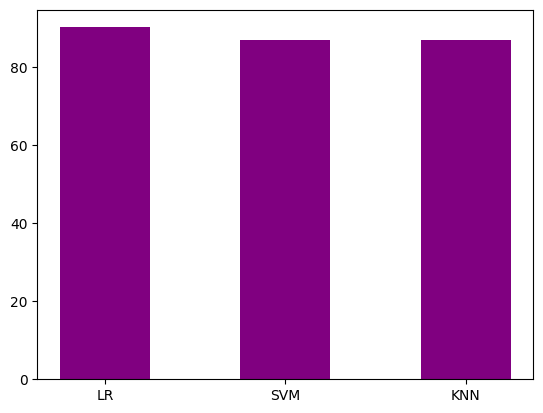

In [37]:
plt.bar(final_data["Models"],final_data["ACC"],width=0.5,color='purple')
plt.show()

In [38]:
X= data.drop('target',axis=1)
Y= data['target']

In [39]:
from sklearn.linear_model import LogisticRegression

In [ ]:
log=LogisticRegression()
log.fit(X,Y)

In [41]:
X

,age,sex,trestbps,chol,thalach,oldpeak,cp_1,cp_2,cp_3,fbs_1,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,0.949794,1,0.764066,-0.261285,0.018826,1.084022,False,False,True,True,...,False,False,False,False,False,False,False,True,False,False
1,-1.928548,1,-0.091401,0.067741,1.636979,2.118926,False,True,False,False,...,False,False,False,False,False,False,False,False,True,False
2,-1.485726,0,-0.091401,-0.822564,0.980971,0.307844,True,False,False,False,...,False,False,True,False,False,False,False,False,True,False
3,0.174856,1,-0.661712,-0.203222,1.243374,-0.209608,True,False,False,False,...,False,False,True,False,False,False,False,False,True,False
4,0.285561,0,-0.661712,2.080602,0.587366,-0.382092,False,False,False,False,...,True,False,True,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.285561,0,0.478910,-0.106449,-1.161988,-0.727060,False,False,False,False,...,True,True,False,False,False,False,False,False,False,True
299,-1.042904,1,-1.232023,0.338703,-0.768384,0.135360,False,False,True,False,...,False,True,False,False,False,False,False,False,False,True
300,1.503322,1,0.707035,-1.035462,-0.374779,2.032684,False,False,False,True,...,False,True,False,False,True,False,False,False,False,True
301,0.285561,1,-0.091401,-2.235438,-1.511859,0.135360,False,False,False,False,...,True,True,False,True,False,False,False,False,False,True


In [42]:
import pandas as pd
import numpy as np

In [43]:
n_data = pd.DataFrame({
    'age':62,
    'sex':0,
    'cp':0,
    'trestbps':140,
    'chol':268,
    'fbs':0,
    'restecg':0,
    'thalach':160,
    'exang':0,
    'oldpeak':3.6,
    'slope':0,
    'ca':2,
    'thal':2,
    
},index=[0])

In [46]:
import joblib

In [50]:
joblib.dump(log,'model_joblib_heart')

['model_joblib_heart']

In [51]:
from tkinter import *
import joblib
def show_entry_fields():
    p1=int(e1.get())
    p2=int(e2.get())
    p3=int(e3.get())
    p4=int(e4.get())
    p5=int(e5.get())
    p6=int(e6.get())
    p7=int(e7.get())
    p8=int(e8.get())
    p9=int(e9.get())
    p10=float(e10.get())
    p11=int(e11.get())
    p12=int(e12.get())
    p13=int(e13.get())
    log = joblib.load('model_joblib_heart')
    test_data = sc.transform([[p1,p2,p3,p4,p5,p6,p7,p8,p9,p10,p11,p12,p13]])
    result = log.predict(test_data)
    
    if result == 0:
        Label(master,text="No Heart Disease").grid(row=31)
    else :
        Label(master,text="Possibility of Heart Disease").grid(row=31)
        
master = Tk()
master.title("Heart Disease Prediction System")

label = Label(master,text = "Heart Disease Prediction System",
              bg = "black",fg = "white"). grid(row=0,columnspan=2)

Label(master,text="Enter Your Age").grid(row = 1)
Label(master,text="Male Or Female [1/0]").grid(row = 2)
Label(master,text="Enter Value of CP").grid(row = 3)
Label(master,text="Enter Value of trestbps").grid(row = 4)
Label(master,text="Enter Value of chol").grid(row = 5)
Label(master,text="Enter Value of fbs").grid(row = 6)
Label(master,text="Enter Value of restecg").grid(row = 7)
Label(master,text="Enter Value of thalach").grid(row = 8)
Label(master,text="Enter Value of exang").grid(row = 9)
Label(master,text="Enter Value of oldpeak").grid(row = 10)
Label(master,text="Enter Value of slope").grid(row = 11)
Label(master,text="Enter Value of ca").grid(row = 12)
Label(master,text="Enter Value of thal").grid(row = 13)

e1 = Entry(master)
e2 = Entry(master)
e3 = Entry(master)
e4 = Entry(master)
e5 = Entry(master)
e6 = Entry(master)
e7 = Entry(master)
e8 = Entry(master)
e9 = Entry(master)
e10 = Entry(master)
e11 = Entry(master)
e12 = Entry(master)
e13 = Entry(master)

e1.grid(row=1, column=1)
e2.grid(row=2, column=1)
e3.grid(row=3, column=1)
e4.grid(row=4, column=1)
e5.grid(row=5, column=1)
e6.grid(row=6, column=1)
e7.grid(row=7, column=1)
e8.grid(row=8, column=1)
e9.grid(row=9, column=1)
e10.grid(row=10, column=1)
e11.grid(row=11, column=1)
e12.grid(row=12, column=1)
e13.grid(row=13, column=1)

Button(master,text="Predict",command=show_entry_fields).grid()

mainloop()